In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install flair==0.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 11.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 16.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 56.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 66.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.9/11.9 MB 93.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1

In [3]:
!pip install transformers==4.30.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 53.9 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.15.0
    Uninstalling tokenizers-0.15.0:
      Successfully uninstalled tokenizers-0.15.0
  Attempting uninstall: transformers
    Found existing installation: transformers 4.35.2
    Uninstalling transformers-4.35.2:
      Successfully uninstalled transformers-4.35.2


In [4]:
from flair.data import Corpus
from flair.datasets import ColumnCorpus
from flair.embeddings import TokenEmbeddings, WordEmbeddings, StackedEmbeddings, FlairEmbeddings, FastTextEmbeddings
from typing import List

In [5]:
# Spanish corpus of 44 texts from ECHR (automatic translations with manual annotations)

columns = {0:'text', 1:'ner'}

corpus_folder = '/content/drive/MyDrive/.../'
corpus : Corpus = ColumnCorpus(corpus_folder, columns,
                                    train_file='ES-manual-train.tsv', column_delimiter=' ',
                                    dev_file='ES-manual-dev.tsv',
                                    test_file='ES-manual-test.tsv'
)

# obtain and print corpus statistics
stats = corpus.obtain_statistics()
print(stats)

2024-01-23 15:23:59,251 Reading data from /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler
2024-01-23 15:23:59,252 Train: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-train.tsv
2024-01-23 15:23:59,253 Dev: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-dev.tsv
2024-01-23 15:23:59,254 Test: /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/ES-manual-test.tsv
{
    "TRAIN": {
        "dataset": "TRAIN",
        "total_number_of_documents": 1245,
        "number_of_documents_per_class": {
            "CODE": 72,
            "LOC": 318,
            "NATIONALITY": 73,
            "PER": 133,
            "DATE": 600,
            "LEGAL_PROFESSIONAL": 141,
            "ORG": 113,
            "QUANTITY": 162,
            "ETHNIC_CATEGORY": 21,
            "CURRENCY": 24,
            "TIME": 3
        },
        "number_of_tokens_per_tag": {},
        "number_of_tokens": {
            "total": 34924,
            "min": 1,


In [6]:
# initialize sequence tagger
from flair.models import SequenceTagger

tagger = SequenceTagger.load("flair/ner-multi")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/1.72G [00:00<?, ?B/s]

2024-01-23 15:24:16,137 SequenceTagger predicts: Dictionary with 20 tags: <unk>, O, B-PER, E-PER, S-LOC, B-MISC, I-MISC, E-MISC, S-PER, B-ORG, E-ORG, S-ORG, I-ORG, B-LOC, E-LOC, S-MISC, I-PER, I-LOC, <START>, <STOP>


In [7]:
# 2. what tag do we want to predict?
tag_type = 'ner'

# 3. make the tag dictionary from the corpus
new_tag_dictionary = corpus.make_label_dictionary(label_type=tag_type)
print(new_tag_dictionary.idx2item)

2024-01-23 15:24:16,812 Computing label dictionary. Progress:


1245it [00:00, 42611.82it/s]

2024-01-23 15:24:16,848 Dictionary created for label 'ner' with 12 values: DATE (seen 600 times), LOC (seen 318 times), QUANTITY (seen 162 times), LEGAL_PROFESSIONAL (seen 141 times), PER (seen 133 times), ORG (seen 113 times), NATIONALITY (seen 73 times), CODE (seen 72 times), CURRENCY (seen 24 times), ETHNIC_CATEGORY (seen 21 times), TIME (seen 3 times)
[b'<unk>', b'DATE', b'LOC', b'QUANTITY', b'LEGAL_PROFESSIONAL', b'PER', b'ORG', b'NATIONALITY', b'CODE', b'CURRENCY', b'ETHNIC_CATEGORY', b'TIME']


In [8]:
print(tagger.label_dictionary.idx2item)

[b'<unk>', b'O', b'B-PER', b'E-PER', b'S-LOC', b'B-MISC', b'I-MISC', b'E-MISC', b'S-PER', b'B-ORG', b'E-ORG', b'S-ORG', b'I-ORG', b'B-LOC', b'E-LOC', b'S-MISC', b'I-PER', b'I-LOC', b'<START>', b'<STOP>']


In [9]:
new_tagger = SequenceTagger(tagger.embeddings, new_tag_dictionary, tag_type=tag_type)

2024-01-23 15:24:16,863 SequenceTagger predicts: Dictionary with 45 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME


In [10]:
# initialize trainer
from flair.trainers import ModelTrainer
trainer = ModelTrainer(new_tagger, corpus)

In [11]:
# train # train_with_dev=True
trainer.train('/content/drive/MyDrive/...',
              learning_rate=0.1,
              mini_batch_size=32,
              max_epochs=18,
              write_weights=True)
# saving the model into your drive (need to provide the full path of the folder in which you want to save the model)

2024-01-23 15:24:17,335 ----------------------------------------------------------------------------------------------------
2024-01-23 15:24:17,738 Model: "SequenceTagger(
  (embeddings): StackedEmbeddings(
    (list_embedding_0): WordEmbeddings(
      '/home/alan/.flair/embeddings/glove.gensim'
      (embedding): Embedding(400001, 100)
    )
    (list_embedding_1): WordEmbeddings(
      '/home/alan/.flair/embeddings/de-wiki-fasttext-300d-1M'
      (embedding): Embedding(1000000, 300)
    )
    (list_embedding_2): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_features=300, bias=True)
      )
    )
    (list_embedding_3): FlairEmbeddings(
      (lm): LanguageModel(
        (drop): Dropout(p=0.5, inplace=False)
        (encoder): Embedding(300, 100)
        (rnn): LSTM(100, 2048)
        (decoder): Linear(in_features=2048, out_

100%|██████████| 6/6 [00:02<00:00,  2.76it/s]

2024-01-23 15:24:48,791 Evaluating as a multi-label problem: False
2024-01-23 15:24:48,810 DEV : loss 0.4673522710800171 - f1-score (micro avg)  0.2742
2024-01-23 15:24:48,830 BAD EPOCHS (no improvement): 0
2024-01-23 15:24:48,835 saving best model


2024-01-23 15:24:54,728 ----------------------------------------------------------------------------------------------------
2024-01-23 15:24:55,283 epoch 2 - iter 3/39 - loss 0.52152056 - time (sec): 0.55 - samples/sec: 4585.62 - lr: 0.100000
2024-01-23 15:24:58,710 epoch 2 - iter 6/39 - loss 0.52650933 - time (sec): 3.98 - samples/sec: 1279.07 - lr: 0.100000
2024-01-23 15:25:00,281 epoch 2 - iter 9/39 - loss 0.52350249 - time (sec): 5.55 - samples/sec: 1388.47 - lr: 0.100000
2024-01-23 15:25:01,878 epoch 2 - iter 12/39 - loss 0.50356941 - time (sec): 7.15 - samples/sec: 1450.57 - lr: 0.100000
2024-01-23 15:25:03,521 epoch 2 - iter 15/39 - loss 0.48871763 - time (sec): 8.79 - samples/sec: 1479.92 - lr: 0.100000
2024-01-23 15:25:05,241 epoch 2 - iter 18/39 - loss 0.46683155 - time (sec): 10.51 - samples/sec: 1489.70 - lr: 0.100000
2024-01-23 15:25:06,798 epoch 2 - iter 21/39 - loss 0.46887716 - time (sec): 12.07 - samples/sec: 1513.18 - lr: 0.100000
2024-01-23 15:25:08,556 epoch 2 - it

100%|██████████| 6/6 [00:01<00:00,  3.75it/s]

2024-01-23 15:25:20,341 Evaluating as a multi-label problem: False
2024-01-23 15:25:20,353 DEV : loss 0.27391475439071655 - f1-score (micro avg)  0.4601


2024-01-23 15:25:20,376 BAD EPOCHS (no improvement): 0
2024-01-23 15:25:20,381 saving best model
2024-01-23 15:25:25,858 ----------------------------------------------------------------------------------------------------
2024-01-23 15:25:26,808 epoch 3 - iter 3/39 - loss 0.30725603 - time (sec): 0.95 - samples/sec: 2749.52 - lr: 0.100000
2024-01-23 15:25:29,691 epoch 3 - iter 6/39 - loss 0.31852229 - time (sec): 3.83 - samples/sec: 1352.48 - lr: 0.100000
2024-01-23 15:25:31,325 epoch 3 - iter 9/39 - loss 0.32348288 - time (sec): 5.47 - samples/sec: 1463.19 - lr: 0.100000
2024-01-23 15:25:32,859 epoch 3 - iter 12/39 - loss 0.30414477 - time (sec): 7.00 - samples/sec: 1505.48 - lr: 0.100000
2024-01-23 15:25:35,509 epoch 3 - iter 15/39 - loss 0.38184743 - time (sec): 9.65 - samples/sec: 1409.41 - lr: 0.100000
2024-01-23 15:25:37,098 epoch 3 - iter 18/39 - loss 0.36472888 - time (sec): 11.24 - samples/sec: 1441.51 - lr: 0.100000
2024-01-23 15:25:38,901 epoch 3 - iter 21/39 - loss 0.354442

100%|██████████| 6/6 [00:01<00:00,  4.21it/s]

2024-01-23 15:25:51,565 Evaluating as a multi-label problem: False
2024-01-23 15:25:51,584 DEV : loss 0.18239277601242065 - f1-score (micro avg)  0.56
2024-01-23 15:25:51,611 BAD EPOCHS (no improvement): 0


2024-01-23 15:25:51,617 saving best model
2024-01-23 15:25:57,238 ----------------------------------------------------------------------------------------------------
2024-01-23 15:25:57,805 epoch 4 - iter 3/39 - loss 0.18145266 - time (sec): 0.57 - samples/sec: 4704.41 - lr: 0.100000
2024-01-23 15:26:01,259 epoch 4 - iter 6/39 - loss 0.19006132 - time (sec): 4.02 - samples/sec: 1269.33 - lr: 0.100000
2024-01-23 15:26:02,817 epoch 4 - iter 9/39 - loss 0.21544608 - time (sec): 5.58 - samples/sec: 1399.45 - lr: 0.100000
2024-01-23 15:26:04,236 epoch 4 - iter 12/39 - loss 0.21364975 - time (sec): 7.00 - samples/sec: 1468.68 - lr: 0.100000
2024-01-23 15:26:05,850 epoch 4 - iter 15/39 - loss 0.20898134 - time (sec): 8.61 - samples/sec: 1515.42 - lr: 0.100000
2024-01-23 15:26:07,503 epoch 4 - iter 18/39 - loss 0.21729161 - time (sec): 10.26 - samples/sec: 1532.23 - lr: 0.100000
2024-01-23 15:26:09,204 epoch 4 - iter 21/39 - loss 0.21327621 - time (sec): 11.96 - samples/sec: 1540.24 - lr: 0.1

100%|██████████| 6/6 [00:01<00:00,  3.76it/s]

2024-01-23 15:26:22,916 Evaluating as a multi-label problem: False
2024-01-23 15:26:22,932 DEV : loss 0.13971170783042908 - f1-score (micro avg)  0.6832


2024-01-23 15:26:22,957 BAD EPOCHS (no improvement): 0
2024-01-23 15:26:22,965 saving best model
2024-01-23 15:26:28,506 ----------------------------------------------------------------------------------------------------
2024-01-23 15:26:29,102 epoch 5 - iter 3/39 - loss 0.25392684 - time (sec): 0.59 - samples/sec: 4396.68 - lr: 0.100000
2024-01-23 15:26:32,678 epoch 5 - iter 6/39 - loss 0.21001654 - time (sec): 4.17 - samples/sec: 1242.70 - lr: 0.100000
2024-01-23 15:26:34,266 epoch 5 - iter 9/39 - loss 0.21033608 - time (sec): 5.76 - samples/sec: 1429.50 - lr: 0.100000
2024-01-23 15:26:35,767 epoch 5 - iter 12/39 - loss 0.19963383 - time (sec): 7.26 - samples/sec: 1451.09 - lr: 0.100000
2024-01-23 15:26:37,378 epoch 5 - iter 15/39 - loss 0.19623383 - time (sec): 8.87 - samples/sec: 1475.13 - lr: 0.100000
2024-01-23 15:26:38,989 epoch 5 - iter 18/39 - loss 0.19075165 - time (sec): 10.48 - samples/sec: 1514.86 - lr: 0.100000
2024-01-23 15:26:40,698 epoch 5 - iter 21/39 - loss 0.195132

100%|██████████| 6/6 [00:01<00:00,  4.04it/s]

2024-01-23 15:26:54,063 Evaluating as a multi-label problem: False
2024-01-23 15:26:54,083 DEV : loss 0.131529301404953 - f1-score (micro avg)  0.7808
2024-01-23 15:26:54,105 BAD EPOCHS (no improvement): 0
2024-01-23 15:26:54,110 saving best model


2024-01-23 15:26:59,704 ----------------------------------------------------------------------------------------------------
2024-01-23 15:27:00,325 epoch 6 - iter 3/39 - loss 0.18608078 - time (sec): 0.62 - samples/sec: 4011.24 - lr: 0.100000
2024-01-23 15:27:03,934 epoch 6 - iter 6/39 - loss 0.17016842 - time (sec): 4.23 - samples/sec: 1223.89 - lr: 0.100000
2024-01-23 15:27:05,502 epoch 6 - iter 9/39 - loss 0.16654377 - time (sec): 5.80 - samples/sec: 1318.60 - lr: 0.100000
2024-01-23 15:27:07,017 epoch 6 - iter 12/39 - loss 0.16416489 - time (sec): 7.31 - samples/sec: 1380.18 - lr: 0.100000
2024-01-23 15:27:08,589 epoch 6 - iter 15/39 - loss 0.15216601 - time (sec): 8.88 - samples/sec: 1426.30 - lr: 0.100000
2024-01-23 15:27:10,295 epoch 6 - iter 18/39 - loss 0.15107874 - time (sec): 10.59 - samples/sec: 1458.63 - lr: 0.100000
2024-01-23 15:27:12,385 epoch 6 - iter 21/39 - loss 0.15550001 - time (sec): 12.68 - samples/sec: 1428.94 - lr: 0.100000
2024-01-23 15:27:14,234 epoch 6 - it

100%|██████████| 6/6 [00:01<00:00,  4.04it/s]

2024-01-23 15:27:26,490 Evaluating as a multi-label problem: False
2024-01-23 15:27:26,504 DEV : loss 0.10296142846345901 - f1-score (micro avg)  0.7704
2024-01-23 15:27:26,528 BAD EPOCHS (no improvement): 1


2024-01-23 15:27:26,534 ----------------------------------------------------------------------------------------------------
2024-01-23 15:27:27,145 epoch 7 - iter 3/39 - loss 0.11197685 - time (sec): 0.61 - samples/sec: 4265.08 - lr: 0.100000
2024-01-23 15:27:29,845 epoch 7 - iter 6/39 - loss 0.25724569 - time (sec): 3.31 - samples/sec: 1799.77 - lr: 0.100000
2024-01-23 15:27:31,511 epoch 7 - iter 9/39 - loss 0.22283440 - time (sec): 4.98 - samples/sec: 1785.22 - lr: 0.100000
2024-01-23 15:27:33,142 epoch 7 - iter 12/39 - loss 0.19620624 - time (sec): 6.61 - samples/sec: 1822.85 - lr: 0.100000
2024-01-23 15:27:34,652 epoch 7 - iter 15/39 - loss 0.18561343 - time (sec): 8.12 - samples/sec: 1807.84 - lr: 0.100000
2024-01-23 15:27:36,277 epoch 7 - iter 18/39 - loss 0.18212710 - time (sec): 9.74 - samples/sec: 1773.99 - lr: 0.100000
2024-01-23 15:27:37,755 epoch 7 - iter 21/39 - loss 0.17733659 - time (sec): 11.22 - samples/sec: 1745.82 - lr: 0.100000
2024-01-23 15:27:39,265 epoch 7 - ite

100%|██████████| 6/6 [00:01<00:00,  4.37it/s]

2024-01-23 15:27:49,122 Evaluating as a multi-label problem: False
2024-01-23 15:27:49,135 DEV : loss 0.08450847864151001 - f1-score (micro avg)  0.7848
2024-01-23 15:27:49,155 BAD EPOCHS (no improvement): 0
2024-01-23 15:27:49,160 saving best model


2024-01-23 15:27:54,803 ----------------------------------------------------------------------------------------------------
2024-01-23 15:27:55,391 epoch 8 - iter 3/39 - loss 0.12459444 - time (sec): 0.59 - samples/sec: 4464.33 - lr: 0.100000
2024-01-23 15:27:58,688 epoch 8 - iter 6/39 - loss 0.10692486 - time (sec): 3.88 - samples/sec: 1395.96 - lr: 0.100000
2024-01-23 15:28:00,228 epoch 8 - iter 9/39 - loss 0.10759641 - time (sec): 5.42 - samples/sec: 1468.26 - lr: 0.100000
2024-01-23 15:28:01,760 epoch 8 - iter 12/39 - loss 0.10352533 - time (sec): 6.96 - samples/sec: 1526.03 - lr: 0.100000
2024-01-23 15:28:03,396 epoch 8 - iter 15/39 - loss 0.11256277 - time (sec): 8.59 - samples/sec: 1558.94 - lr: 0.100000
2024-01-23 15:28:05,196 epoch 8 - iter 18/39 - loss 0.11533705 - time (sec): 10.39 - samples/sec: 1539.98 - lr: 0.100000
2024-01-23 15:28:06,906 epoch 8 - iter 21/39 - loss 0.11634779 - time (sec): 12.10 - samples/sec: 1550.57 - lr: 0.100000
2024-01-23 15:28:08,697 epoch 8 - it

100%|██████████| 6/6 [00:01<00:00,  4.06it/s]

2024-01-23 15:28:20,657 Evaluating as a multi-label problem: False
2024-01-23 15:28:20,670 DEV : loss 0.08850907534360886 - f1-score (micro avg)  0.7949
2024-01-23 15:28:20,691 BAD EPOCHS (no improvement): 0
2024-01-23 15:28:20,697 saving best model


2024-01-23 15:28:26,968 ----------------------------------------------------------------------------------------------------
2024-01-23 15:28:27,589 epoch 9 - iter 3/39 - loss 0.10124099 - time (sec): 0.62 - samples/sec: 4327.28 - lr: 0.100000
2024-01-23 15:28:30,783 epoch 9 - iter 6/39 - loss 0.11123056 - time (sec): 3.81 - samples/sec: 1407.04 - lr: 0.100000
2024-01-23 15:28:32,374 epoch 9 - iter 9/39 - loss 0.11697170 - time (sec): 5.40 - samples/sec: 1525.90 - lr: 0.100000
2024-01-23 15:28:34,966 epoch 9 - iter 12/39 - loss 0.15908414 - time (sec): 8.00 - samples/sec: 1412.42 - lr: 0.100000
2024-01-23 15:28:36,697 epoch 9 - iter 15/39 - loss 0.15204468 - time (sec): 9.73 - samples/sec: 1441.15 - lr: 0.100000
2024-01-23 15:28:38,360 epoch 9 - iter 18/39 - loss 0.14781943 - time (sec): 11.39 - samples/sec: 1443.71 - lr: 0.100000
2024-01-23 15:28:39,984 epoch 9 - iter 21/39 - loss 0.14416770 - time (sec): 13.01 - samples/sec: 1447.76 - lr: 0.100000
2024-01-23 15:28:41,732 epoch 9 - it

100%|██████████| 6/6 [00:01<00:00,  3.20it/s]

2024-01-23 15:28:53,422 Evaluating as a multi-label problem: False
2024-01-23 15:28:53,435 DEV : loss 0.07369949668645859 - f1-score (micro avg)  0.8362
2024-01-23 15:28:53,455 BAD EPOCHS (no improvement): 0


2024-01-23 15:28:53,460 saving best model
2024-01-23 15:28:59,160 ----------------------------------------------------------------------------------------------------
2024-01-23 15:28:59,689 epoch 10 - iter 3/39 - loss 0.08807055 - time (sec): 0.53 - samples/sec: 4227.41 - lr: 0.100000
2024-01-23 15:29:03,247 epoch 10 - iter 6/39 - loss 0.08363770 - time (sec): 4.09 - samples/sec: 1162.24 - lr: 0.100000
2024-01-23 15:29:04,789 epoch 10 - iter 9/39 - loss 0.09316205 - time (sec): 5.63 - samples/sec: 1338.96 - lr: 0.100000
2024-01-23 15:29:06,293 epoch 10 - iter 12/39 - loss 0.09931495 - time (sec): 7.13 - samples/sec: 1407.14 - lr: 0.100000
2024-01-23 15:29:07,787 epoch 10 - iter 15/39 - loss 0.10277943 - time (sec): 8.63 - samples/sec: 1456.67 - lr: 0.100000
2024-01-23 15:29:09,473 epoch 10 - iter 18/39 - loss 0.09952607 - time (sec): 10.31 - samples/sec: 1492.12 - lr: 0.100000
2024-01-23 15:29:11,235 epoch 10 - iter 21/39 - loss 0.10114980 - time (sec): 12.07 - samples/sec: 1498.34 - 

100%|██████████| 6/6 [00:01<00:00,  3.68it/s]

2024-01-23 15:29:24,754 Evaluating as a multi-label problem: False
2024-01-23 15:29:24,769 DEV : loss 0.06271570175886154 - f1-score (micro avg)  0.8571


2024-01-23 15:29:24,793 BAD EPOCHS (no improvement): 0
2024-01-23 15:29:24,799 saving best model
2024-01-23 15:29:30,511 ----------------------------------------------------------------------------------------------------
2024-01-23 15:29:31,978 epoch 11 - iter 3/39 - loss 0.21421176 - time (sec): 1.46 - samples/sec: 2030.05 - lr: 0.100000
2024-01-23 15:29:34,315 epoch 11 - iter 6/39 - loss 0.15198846 - time (sec): 3.80 - samples/sec: 1469.74 - lr: 0.100000
2024-01-23 15:29:35,795 epoch 11 - iter 9/39 - loss 0.12762039 - time (sec): 5.28 - samples/sec: 1545.96 - lr: 0.100000
2024-01-23 15:29:37,284 epoch 11 - iter 12/39 - loss 0.11420911 - time (sec): 6.77 - samples/sec: 1596.30 - lr: 0.100000
2024-01-23 15:29:39,196 epoch 11 - iter 15/39 - loss 0.11035991 - time (sec): 8.68 - samples/sec: 1576.53 - lr: 0.100000
2024-01-23 15:29:40,857 epoch 11 - iter 18/39 - loss 0.10452801 - time (sec): 10.34 - samples/sec: 1576.05 - lr: 0.100000
2024-01-23 15:29:42,483 epoch 11 - iter 21/39 - loss 0

100%|██████████| 6/6 [00:01<00:00,  4.21it/s]

2024-01-23 15:29:55,020 Evaluating as a multi-label problem: False
2024-01-23 15:29:55,034 DEV : loss 0.06545668840408325 - f1-score (micro avg)  0.8514
2024-01-23 15:29:55,054 BAD EPOCHS (no improvement): 1
2024-01-23 15:29:55,058 ----------------------------------------------------------------------------------------------------


2024-01-23 15:29:55,592 epoch 12 - iter 3/39 - loss 0.05891696 - time (sec): 0.53 - samples/sec: 4628.00 - lr: 0.100000
2024-01-23 15:29:57,177 epoch 12 - iter 6/39 - loss 0.07026944 - time (sec): 2.12 - samples/sec: 2340.49 - lr: 0.100000
2024-01-23 15:29:58,777 epoch 12 - iter 9/39 - loss 0.08462235 - time (sec): 3.72 - samples/sec: 2073.19 - lr: 0.100000
2024-01-23 15:30:00,407 epoch 12 - iter 12/39 - loss 0.07880659 - time (sec): 5.35 - samples/sec: 1931.75 - lr: 0.100000
2024-01-23 15:30:02,057 epoch 12 - iter 15/39 - loss 0.08427500 - time (sec): 7.00 - samples/sec: 1868.16 - lr: 0.100000
2024-01-23 15:30:04,648 epoch 12 - iter 18/39 - loss 0.11126522 - time (sec): 9.59 - samples/sec: 1733.17 - lr: 0.100000
2024-01-23 15:30:06,125 epoch 12 - iter 21/39 - loss 0.10318189 - time (sec): 11.07 - samples/sec: 1710.73 - lr: 0.100000
2024-01-23 15:30:07,767 epoch 12 - iter 24/39 - loss 0.10292392 - time (sec): 12.71 - samples/sec: 1728.36 - lr: 0.100000
2024-01-23 15:30:09,257 epoch 12 

100%|██████████| 6/6 [00:01<00:00,  4.13it/s]

2024-01-23 15:30:17,725 Evaluating as a multi-label problem: False
2024-01-23 15:30:17,738 DEV : loss 0.06077536195516586 - f1-score (micro avg)  0.8578
2024-01-23 15:30:17,759 BAD EPOCHS (no improvement): 0
2024-01-23 15:30:17,764 saving best model


2024-01-23 15:30:23,142 ----------------------------------------------------------------------------------------------------
2024-01-23 15:30:24,024 epoch 13 - iter 3/39 - loss 0.07355542 - time (sec): 0.88 - samples/sec: 2872.60 - lr: 0.100000
2024-01-23 15:30:27,345 epoch 13 - iter 6/39 - loss 0.08583938 - time (sec): 4.20 - samples/sec: 1313.56 - lr: 0.100000
2024-01-23 15:30:28,865 epoch 13 - iter 9/39 - loss 0.08004534 - time (sec): 5.72 - samples/sec: 1470.65 - lr: 0.100000
2024-01-23 15:30:30,342 epoch 13 - iter 12/39 - loss 0.07969277 - time (sec): 7.20 - samples/sec: 1561.21 - lr: 0.100000
2024-01-23 15:30:32,734 epoch 13 - iter 15/39 - loss 0.11142496 - time (sec): 9.59 - samples/sec: 1482.22 - lr: 0.100000
2024-01-23 15:30:34,423 epoch 13 - iter 18/39 - loss 0.11317416 - time (sec): 11.28 - samples/sec: 1505.84 - lr: 0.100000
2024-01-23 15:30:36,018 epoch 13 - iter 21/39 - loss 0.10554322 - time (sec): 12.87 - samples/sec: 1523.21 - lr: 0.100000
2024-01-23 15:30:37,657 epoch

100%|██████████| 6/6 [00:01<00:00,  3.96it/s]

2024-01-23 15:30:48,399 Evaluating as a multi-label problem: False
2024-01-23 15:30:48,416 DEV : loss 0.049682892858982086 - f1-score (micro avg)  0.8516


2024-01-23 15:30:48,447 BAD EPOCHS (no improvement): 1
2024-01-23 15:30:48,452 ----------------------------------------------------------------------------------------------------
2024-01-23 15:30:49,030 epoch 14 - iter 3/39 - loss 0.07095630 - time (sec): 0.58 - samples/sec: 4376.35 - lr: 0.100000
2024-01-23 15:30:51,445 epoch 14 - iter 6/39 - loss 0.14634066 - time (sec): 2.99 - samples/sec: 1874.83 - lr: 0.100000
2024-01-23 15:30:53,063 epoch 14 - iter 9/39 - loss 0.11506731 - time (sec): 4.61 - samples/sec: 1789.63 - lr: 0.100000
2024-01-23 15:30:54,695 epoch 14 - iter 12/39 - loss 0.10614476 - time (sec): 6.24 - samples/sec: 1769.58 - lr: 0.100000
2024-01-23 15:30:56,180 epoch 14 - iter 15/39 - loss 0.10418485 - time (sec): 7.73 - samples/sec: 1765.39 - lr: 0.100000
2024-01-23 15:30:57,840 epoch 14 - iter 18/39 - loss 0.10318607 - time (sec): 9.39 - samples/sec: 1763.62 - lr: 0.100000
2024-01-23 15:30:59,323 epoch 14 - iter 21/39 - loss 0.09978194 - time (sec): 10.87 - samples/sec

100%|██████████| 6/6 [00:01<00:00,  4.41it/s]

2024-01-23 15:31:10,866 Evaluating as a multi-label problem: False
2024-01-23 15:31:10,880 DEV : loss 0.04617222771048546 - f1-score (micro avg)  0.8679
2024-01-23 15:31:10,901 BAD EPOCHS (no improvement): 0
2024-01-23 15:31:10,906 saving best model


2024-01-23 15:31:16,367 ----------------------------------------------------------------------------------------------------
2024-01-23 15:31:16,976 epoch 15 - iter 3/39 - loss 0.08791557 - time (sec): 0.61 - samples/sec: 4060.63 - lr: 0.100000
2024-01-23 15:31:20,756 epoch 15 - iter 6/39 - loss 0.08393846 - time (sec): 4.39 - samples/sec: 1236.20 - lr: 0.100000
2024-01-23 15:31:22,346 epoch 15 - iter 9/39 - loss 0.08044817 - time (sec): 5.98 - samples/sec: 1379.77 - lr: 0.100000
2024-01-23 15:31:23,901 epoch 15 - iter 12/39 - loss 0.07291441 - time (sec): 7.53 - samples/sec: 1454.37 - lr: 0.100000
2024-01-23 15:31:25,657 epoch 15 - iter 15/39 - loss 0.07116892 - time (sec): 9.29 - samples/sec: 1484.26 - lr: 0.100000
2024-01-23 15:31:27,277 epoch 15 - iter 18/39 - loss 0.07053490 - time (sec): 10.91 - samples/sec: 1499.87 - lr: 0.100000
2024-01-23 15:31:28,957 epoch 15 - iter 21/39 - loss 0.06818016 - time (sec): 12.59 - samples/sec: 1500.78 - lr: 0.100000
2024-01-23 15:31:30,636 epoch

100%|██████████| 6/6 [00:01<00:00,  4.06it/s]

2024-01-23 15:31:42,665 Evaluating as a multi-label problem: False
2024-01-23 15:31:42,677 DEV : loss 0.05258050560951233 - f1-score (micro avg)  0.8772


2024-01-23 15:31:42,701 BAD EPOCHS (no improvement): 0
2024-01-23 15:31:42,706 saving best model
2024-01-23 15:31:48,292 ----------------------------------------------------------------------------------------------------
2024-01-23 15:31:48,820 epoch 16 - iter 3/39 - loss 0.06357745 - time (sec): 0.53 - samples/sec: 4710.47 - lr: 0.100000
2024-01-23 15:31:52,409 epoch 16 - iter 6/39 - loss 0.05329000 - time (sec): 4.12 - samples/sec: 1166.33 - lr: 0.100000
2024-01-23 15:31:53,893 epoch 16 - iter 9/39 - loss 0.05528918 - time (sec): 5.60 - samples/sec: 1378.08 - lr: 0.100000
2024-01-23 15:31:56,368 epoch 16 - iter 12/39 - loss 0.09326805 - time (sec): 8.07 - samples/sec: 1309.47 - lr: 0.100000
2024-01-23 15:31:58,105 epoch 16 - iter 15/39 - loss 0.08520885 - time (sec): 9.81 - samples/sec: 1377.53 - lr: 0.100000
2024-01-23 15:31:59,783 epoch 16 - iter 18/39 - loss 0.08631435 - time (sec): 11.49 - samples/sec: 1399.01 - lr: 0.100000
2024-01-23 15:32:01,868 epoch 16 - iter 21/39 - loss 0

100%|██████████| 6/6 [00:01<00:00,  4.01it/s]

2024-01-23 15:32:14,584 Evaluating as a multi-label problem: False
2024-01-23 15:32:14,596 DEV : loss 0.048239871859550476 - f1-score (micro avg)  0.87
2024-01-23 15:32:14,617 BAD EPOCHS (no improvement): 1
2024-01-23 15:32:14,621 ----------------------------------------------------------------------------------------------------


2024-01-23 15:32:15,172 epoch 17 - iter 3/39 - loss 0.08667638 - time (sec): 0.55 - samples/sec: 4956.43 - lr: 0.100000
2024-01-23 15:32:17,544 epoch 17 - iter 6/39 - loss 0.13386421 - time (sec): 2.92 - samples/sec: 1957.22 - lr: 0.100000
2024-01-23 15:32:19,170 epoch 17 - iter 9/39 - loss 0.10809062 - time (sec): 4.55 - samples/sec: 1851.65 - lr: 0.100000
2024-01-23 15:32:20,650 epoch 17 - iter 12/39 - loss 0.09812320 - time (sec): 6.03 - samples/sec: 1785.28 - lr: 0.100000
2024-01-23 15:32:22,213 epoch 17 - iter 15/39 - loss 0.08575248 - time (sec): 7.59 - samples/sec: 1755.91 - lr: 0.100000
2024-01-23 15:32:23,724 epoch 17 - iter 18/39 - loss 0.07905082 - time (sec): 9.10 - samples/sec: 1767.88 - lr: 0.100000
2024-01-23 15:32:25,285 epoch 17 - iter 21/39 - loss 0.07519108 - time (sec): 10.66 - samples/sec: 1752.97 - lr: 0.100000
2024-01-23 15:32:26,761 epoch 17 - iter 24/39 - loss 0.07449054 - time (sec): 12.14 - samples/sec: 1740.37 - lr: 0.100000
2024-01-23 15:32:28,337 epoch 17 

100%|██████████| 6/6 [00:01<00:00,  4.44it/s]

2024-01-23 15:32:36,830 Evaluating as a multi-label problem: False
2024-01-23 15:32:36,844 DEV : loss 0.05303538963198662 - f1-score (micro avg)  0.8922
2024-01-23 15:32:36,866 BAD EPOCHS (no improvement): 0
2024-01-23 15:32:36,871 saving best model


2024-01-23 15:32:42,405 ----------------------------------------------------------------------------------------------------
2024-01-23 15:32:42,999 epoch 18 - iter 3/39 - loss 0.05104111 - time (sec): 0.59 - samples/sec: 4382.68 - lr: 0.100000
2024-01-23 15:32:46,573 epoch 18 - iter 6/39 - loss 0.06294103 - time (sec): 4.17 - samples/sec: 1245.44 - lr: 0.100000
2024-01-23 15:32:48,145 epoch 18 - iter 9/39 - loss 0.06724490 - time (sec): 5.74 - samples/sec: 1383.45 - lr: 0.100000
2024-01-23 15:32:49,650 epoch 18 - iter 12/39 - loss 0.06233836 - time (sec): 7.24 - samples/sec: 1418.13 - lr: 0.100000
2024-01-23 15:32:51,155 epoch 18 - iter 15/39 - loss 0.06713239 - time (sec): 8.75 - samples/sec: 1461.69 - lr: 0.100000
2024-01-23 15:32:53,692 epoch 18 - iter 18/39 - loss 0.08663849 - time (sec): 11.29 - samples/sec: 1390.15 - lr: 0.100000
2024-01-23 15:32:55,373 epoch 18 - iter 21/39 - loss 0.08343628 - time (sec): 12.97 - samples/sec: 1427.34 - lr: 0.100000
2024-01-23 15:32:57,045 epoch

100%|██████████| 6/6 [00:01<00:00,  4.09it/s]

2024-01-23 15:33:08,129 Evaluating as a multi-label problem: False
2024-01-23 15:33:08,143 DEV : loss 0.050177235156297684 - f1-score (micro avg)  0.9007


2024-01-23 15:33:08,170 BAD EPOCHS (no improvement): 0
2024-01-23 15:33:08,175 saving best model
2024-01-23 15:33:19,358 ----------------------------------------------------------------------------------------------------
2024-01-23 15:33:24,872 SequenceTagger predicts: Dictionary with 47 tags: O, S-DATE, B-DATE, E-DATE, I-DATE, S-LOC, B-LOC, E-LOC, I-LOC, S-QUANTITY, B-QUANTITY, E-QUANTITY, I-QUANTITY, S-LEGAL_PROFESSIONAL, B-LEGAL_PROFESSIONAL, E-LEGAL_PROFESSIONAL, I-LEGAL_PROFESSIONAL, S-PER, B-PER, E-PER, I-PER, S-ORG, B-ORG, E-ORG, I-ORG, S-NATIONALITY, B-NATIONALITY, E-NATIONALITY, I-NATIONALITY, S-CODE, B-CODE, E-CODE, I-CODE, S-CURRENCY, B-CURRENCY, E-CURRENCY, I-CURRENCY, S-ETHNIC_CATEGORY, B-ETHNIC_CATEGORY, E-ETHNIC_CATEGORY, I-ETHNIC_CATEGORY, S-TIME, B-TIME, E-TIME, I-TIME, <START>, <STOP>


100%|██████████| 7/7 [00:02<00:00,  3.43it/s]

2024-01-23 15:33:27,627 Evaluating as a multi-label problem: False
2024-01-23 15:33:27,644 0.8097	0.7994	0.8045	0.7151
2024-01-23 15:33:27,645 
Results:
- F-score (micro) 0.8045
- F-score (macro) 0.5797
- Accuracy 0.7151

By class:
                    precision    recall  f1-score   support

              DATE     1.0000    0.9890    0.9945        91
               LOC     0.9630    0.9070    0.9341        86
               PER     0.7879    0.5098    0.6190        51
LEGAL_PROFESSIONAL     0.4848    0.7619    0.5926        21
          QUANTITY     0.7273    0.8000    0.7619        20
       NATIONALITY     0.8750    0.7368    0.8000        19
               ORG     0.1053    0.1667    0.1290        12
              CODE     1.0000    1.0000    1.0000         6
          CURRENCY     0.5000    0.6000    0.5455         5
              TIME     0.0000    0.0000    0.0000         2
   ETHNIC_CATEGORY     0.0000    0.0000    0.0000         1

         micro avg     0.8097    0.7994    0.8

{'test_score': 0.8044871794871794,
 'dev_score_history': [0.27424749163879597,
  0.4600638977635783,
  0.56,
  0.6831683168316831,
  0.7808219178082192,
  0.7704485488126649,
  0.7848101265822784,
  0.7948717948717948,
  0.8361858190709047,
  0.8571428571428572,
  0.8513513513513513,
  0.8578431372549019,
  0.851581508515815,
  0.8679245283018868,
  0.8771929824561403,
  0.8699999999999999,
  0.8921568627450981,
  0.9007263922518159],
 'train_loss_history': [0.9316247772506908,
  0.4415811974081219,
  0.32113177341334037,
  0.23966828808179905,
  0.20109208399399411,
  0.17203743418744988,
  0.15933373293616138,
  0.13431769364369775,
  0.1247685683332021,
  0.10955807051561964,
  0.1030569979858049,
  0.0953485045205303,
  0.09023749002297847,
  0.08833799710621636,
  0.0770471992531998,
  0.07681797662424121,
  0.07108255940578112,
  0.0694537714930993],
 'dev_loss_history': [0.4673522710800171,
  0.27391475439071655,
  0.18239277601242065,
  0.13971170783042908,
  0.131529301404953,

2024-01-23 15:33:27,665 ----------------------------------------------------------------------------------------------------
2024-01-23 15:33:27,666 WARNING: No LOSS found for test split in this data.
2024-01-23 15:33:27,667 Are you sure you want to plot LOSS and not another value?
2024-01-23 15:33:27,668 ----------------------------------------------------------------------------------------------------
2024-01-23 15:33:27,699 ----------------------------------------------------------------------------------------------------
2024-01-23 15:33:27,699 WARNING: No F1 found for test split in this data.
2024-01-23 15:33:27,700 Are you sure you want to plot F1 and not another value?
2024-01-23 15:33:27,701 ----------------------------------------------------------------------------------------------------
2024-01-23 15:33:28,917 Loss and F1 plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual-ES/Flair-manual-model-ES-all/training.png


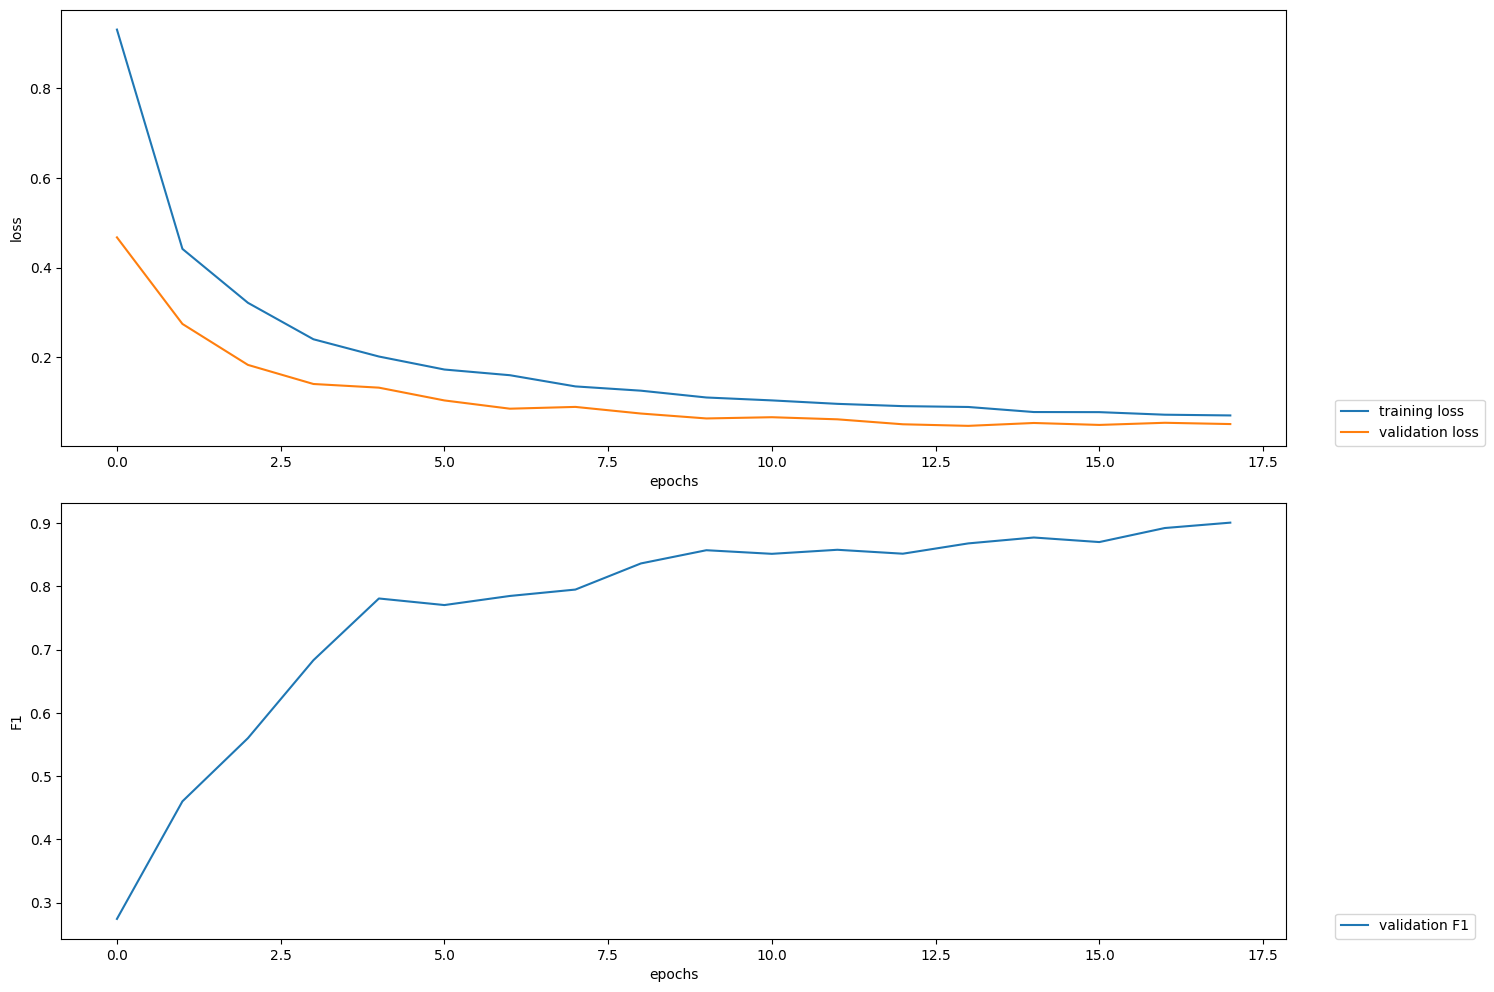

2024-01-23 15:33:32,629 Weights plots are saved in /content/drive/MyDrive/HAPLAPMaster/HAPLAPThesis/Seq-labeler/Flair-ES/Flair-manual-ES/Flair-manual-model-ES-all/weights.png


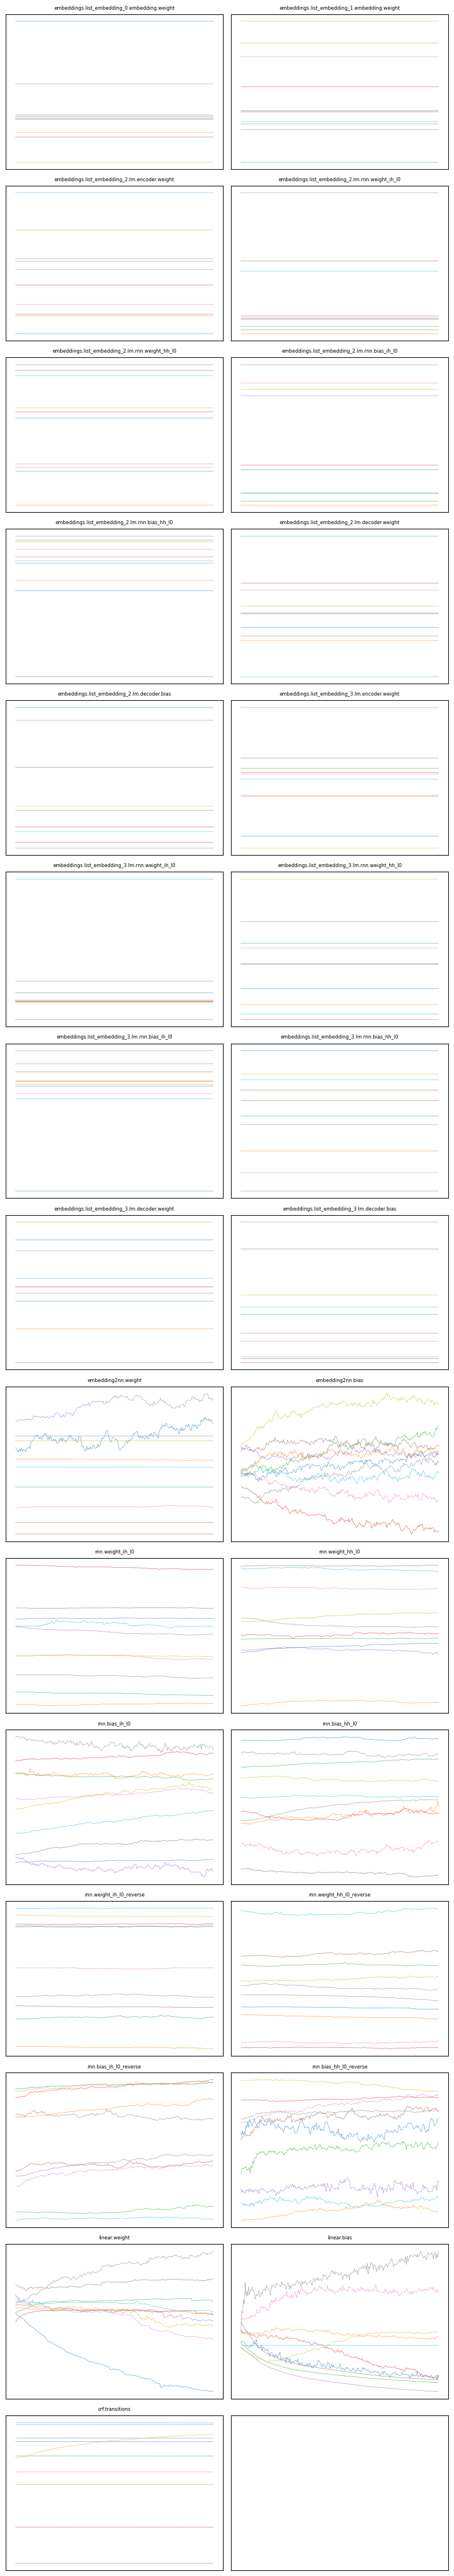

In [12]:
# plot training loss and weights
# Check documentation on training models with Flair

from flair.visual.training_curves import Plotter

plotter = Plotter()
plotter.plot_training_curves('/content/drive/MyDrive/.../loss.tsv')
plotter.plot_weights('/content/drive/MyDrive/.../weights.txt')